In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as pyo
import plotly.express as px
from plotly.offline import iplot,plot,init_notebook_mode
import cufflinks as cf
%matplotlib inline

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv(r"C:\Users\HP\Downloads\heart.csv")

In [6]:
df.info


<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

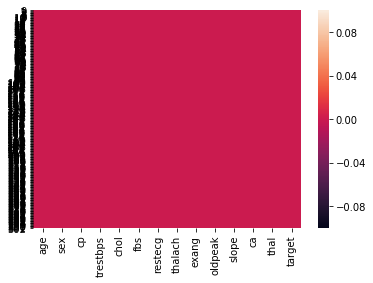

In [32]:
sns.heatmap(df.isnull(),yticklabels=True)

In [9]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [10]:
print(cf.getThemes())

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']


In [11]:
df.iplot(kind="bar",x="age",y="target",theme='henanigans',yTitle="Heart Patients",xTitle="age")

In [12]:
df.iplot(kind="bar",x="sex",y="target",theme='henanigans',yTitle="Heart Patients",xTitle="age")

In [13]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [16]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [17]:
X=df.drop('target',axis=1)
y = df['target']

In [18]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

# Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
LR = LogisticRegression()
LR.fit(X_train,y_train)


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = LR.predict(X_test)


In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score

In [25]:
print(accuracy_score(y_test,y_pred))

0.8688524590163934


In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {'n_jobs':range(1,10),'random_state':(0,50)}

In [28]:
grid = GridSearchCV(LR,param_grid=param_grid,refit=True)

In [29]:
grid.fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\HP\Anaconda3\lib\site-packages

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 7.

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 7.

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\l

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'n_jobs': range(1, 10), 'random_state': (0, 50)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
grid.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=1, penalty='l2', random_state=0,
                   solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [31]:
y_grid = grid.predict(X_test)

In [32]:
accuracy_score(y_grid,y_test)

0.8688524590163934

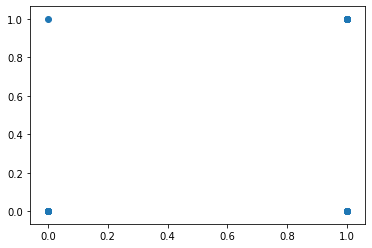

In [54]:
plt.scatter(y_pred,y_test)

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
DT.predict(X_test)

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [111]:
score = DT.predict(X_test)
dt_score=accuracy_score(y_test,score)
dt_score

0.819672131147541

In [38]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid =  {'criterion':['gini','entropy'],'max_depth':range(1,40)}
grid  = GridSearchCV(DT,param_grid,refit=True)

In [50]:
grid.fit(X_train,y_train)
score = grid.predict(X_test)
print(accuracy_score(y_test,score))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



0.819672131147541


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [43]:
grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [44]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [46]:
grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_

# KNN

In [55]:
from sklearn.preprocessing import StandardScaler

In [78]:
std = StandardScaler().fit(X_train)
std_X_train=std.transform(X_train)
std_X_test = std.transform(X_test)

In [79]:
std_X_train

array([[ 1.44921921,  0.70929937,  1.0093251 , ...,  0.94561086,
         0.25659187,  1.17065637],
       [ 1.23313107, -1.40984195, -0.92921994, ..., -0.65465367,
         1.22682988,  1.17065637],
       [-0.2794859 ,  0.70929937,  0.04005258, ...,  0.94561086,
        -0.71364614, -0.486062  ],
       ...,
       [-0.92775032,  0.70929937,  0.04005258, ...,  0.94561086,
        -0.71364614,  1.17065637],
       [-1.46797066,  0.70929937,  0.04005258, ..., -0.65465367,
        -0.71364614, -2.14278037],
       [-0.71166218, -1.40984195,  1.0093251 , ...,  0.94561086,
        -0.71364614, -0.486062  ]])

In [80]:
std_X_test

array([[ 0.04464631,  0.70929937, -0.92921994,  0.44206153, -0.57445787,
        -0.43831293,  0.87935746, -1.71067702,  1.47790748,  3.99137059,
        -2.2549182 , -0.71364614,  1.17065637],
       [-0.2794859 ,  0.70929937,  1.0093251 ,  2.25142965, -0.91156395,
         2.28147501,  0.87935746,  0.520688  , -0.67663234, -0.45541546,
         0.94561086, -0.71364614,  1.17065637],
       [ 0.36877852, -1.40984195, -0.92921994, -1.81964862,  0.00611372,
        -0.43831293, -1.00386825, -1.22940221, -0.67663234, -0.01945604,
        -0.65465367, -0.71364614, -0.486062  ],
       [-1.6840588 , -1.40984195,  1.0093251 ,  0.32897602, -0.51827352,
        -0.43831293,  0.87935746,  0.08316544, -0.67663234, -0.89137487,
        -0.65465367, -0.71364614, -0.486062  ],
       [ 0.58486666,  0.70929937, -0.92921994, -0.40607978,  0.19339488,
        -0.43831293, -1.00386825, -0.39810936,  1.47790748,  1.54999786,
        -0.65465367,  0.25659187,  1.17065637],
       [-0.60361811,  0.709299

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(std_X_train,y_train)
score = knn.predict(std_X_test)

In [103]:
pred_knn = accuracy_score(y_test,score)

In [104]:
k_range = range(1,40)
score={}
score_list=[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(std_X_train,y_train)
    pred = knn.predict(std_X_test)
    score[k]=accuracy_score(y_test,pred)
    score_list.append(accuracy_score(y_test,pred))

In [105]:
px.line(x=k_range,y=score_list)

In [112]:
algo=['Decision Tree','KNeighbors']
scores=[dt_score,pred_knn]

In [116]:
px.bar(df,x=algo,y=scores,color=scores)